In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('breast_cancer.csv')

In [161]:
df.shape

(569, 31)

In [22]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
type(df)

pandas.core.frame.DataFrame

In [34]:
y.replace('M', 1, inplace=True)
y.replace('B', 0, inplace=True)
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [98]:
X.shape

(569, 30)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
def sigmoid_function(z):
    return (1 / (1 + np.exp(-z)))

In [105]:
def cost_func(X, y, theta):
    hyp = sigmoid_function(X.dot(theta))
    return (-(y * np.log(hyp) + (1 - y) * np.log(1 - hyp))).mean()

In [144]:
def gradient_descent(X, y, epochs, alpha=0.1):
    theta = np.zeros(X.shape[1]).T
    # print(theta)
    cost_history = []
    for i in range(epochs):
        y_pred = sigmoid_function(X.dot(theta))
        # print(y_pred)
        gradient = (alpha / X.shape[0]) * ((y_pred - y).T.dot(X))
        theta -= gradient
        cost = cost_func(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [154]:
theta, cost_history = gradient_descent(X, y, 20000)
epochs = np.arange(20000)

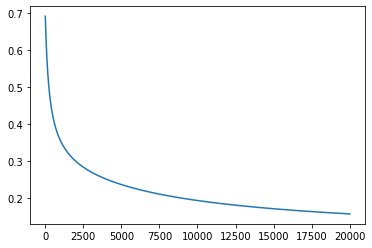

In [155]:
plt.plot(epochs, cost_history)

In [156]:
def predict(X_test, theta):
    y_pred = sigmoid_function(np.dot(X_test, theta))
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    # print(y_pred)
    return y_pred

In [157]:
y_pred = predict(X_test, theta)

In [158]:
def accuracy(y_pred, y_actual):
    return len(y_pred[y_pred == y_actual]) / len(y_pred)

In [159]:
accuracy(y_pred, y_test) * 100

94.73684210526315

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[104,   3],
       [  6,  58]], dtype=int64)